<a href="https://colab.research.google.com/github/poojavjpy/Data-Analytics/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Soft Margins

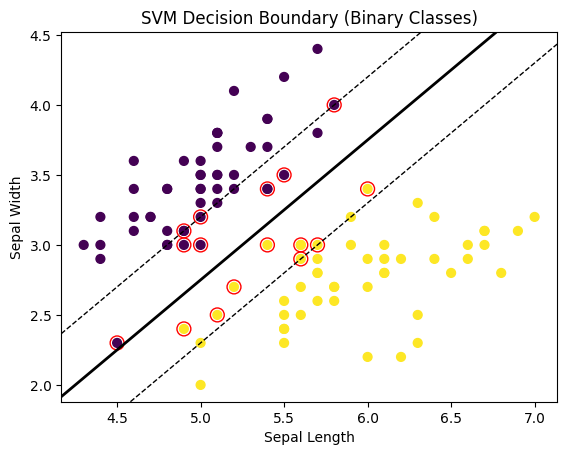

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# ---- Load Dataset ----
iris = datasets.load_iris()

# Use only first 2 features
X = iris.data[:, :2]
y = iris.target

# Filter only class 0 and 1
X = X[y != 2]
y = y[y != 2]

# ---- Split Data ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ---- Train Model ----
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# ---- Plot Points ----
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=40)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")

# ---- Plot Decision Boundary ----
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

# Boundary + margins
ax.contour(XX, YY, Z, levels=[0], linewidths=2, colors='black')
ax.contour(XX, YY, Z, levels=[-1, 1], linewidths=1, colors='black', linestyles='dashed')

# Mark support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
           s=100, linewidths=1, facecolors='none', edgecolors='red')

plt.title("SVM Decision Boundary (Binary Classes)")
plt.show()


Hard Margins

Number of support vectors: [1 1]
Support vectors:
 [[1.95723668 1.59831713]
 [4.31793917 4.22075028]]


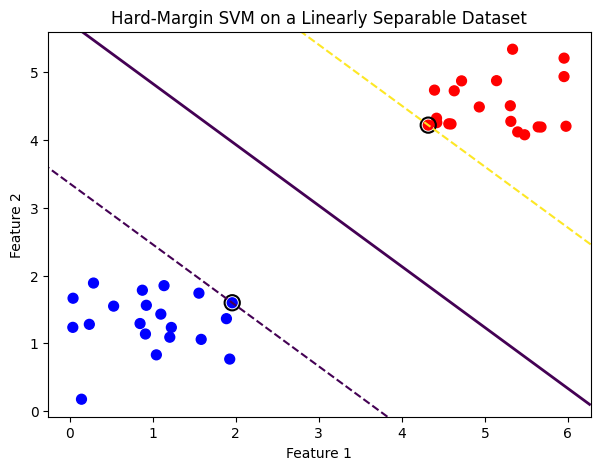

In [2]:
# Hard-Margin SVM example with visualization
# -----------------------------------------
# Dataset: two clearly separated clusters we generate ourselves
# Model : Linear SVM with very large C (≈ hard margin)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# 1. Create a linearly separable dataset
np.random.seed(0)

# Class 0: points around (1, 1)
X0 = np.random.rand(20, 2) * 2        # in [0, 2) x [0, 2)
y0 = np.zeros(20, dtype=int)

# Class 1: points around (5, 5)
X1 = np.random.rand(20, 2) * 2 + 4    # in [4, 6) x [4, 6)
y1 = np.ones(20, dtype=int)

# Combine
X = np.vstack([X0, X1])
y = np.hstack([y0, y1])

# 2. Train a (near) hard-margin SVM
# Very large C → almost no margin violations allowed
model = SVC(kernel='linear', C=1e6)
model.fit(X, y)

print("Number of support vectors:", model.n_support_)
print("Support vectors:\n", model.support_vectors_)

# 3. Plot data points
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', s=50)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# 4. Plot decision boundary & margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 100)
yy = np.linspace(ylim[0], ylim[1], 100)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

# Distance from hyperplane
Z = model.decision_function(xy).reshape(XX.shape)

# Decision boundary (0) and margins (-1, +1)
ax.contour(XX, YY, Z, levels=[0], linewidths=2)              # boundary
ax.contour(XX, YY, Z, levels=[-1, 1], linestyles='dashed')   # margins

# 5. Highlight support vectors
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=120, facecolors='none', edgecolors='black', linewidths=1.5)

plt.title("Hard-Margin SVM on a Linearly Separable Dataset")
plt.show()